In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import missingno as msno

In [2]:
train = pd.read_csv("E:\\Project\\web-traffic-time-series-forecasting\\train_1.csv")

In [3]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [4]:
# original dataset shape
train.shape

(145063, 551)

In [5]:
# missing datta
empty_sample = train[train.isnull().any(axis=1)]
empty_sample.shape

(27786, 551)

In [6]:
# After dropping missing data, we still have 117277 samples.
df_cleaned=train.dropna()
df_cleaned.shape

(117277, 551)

In [7]:
# splitting the Page name
import re

def breakdown_topic(str):
    m = re.search('(.*)\_(.*).wikipedia.org\_(.*)\_(.*)', str)
    if m is not None:
        return m.group(1), m.group(2), m.group(3), m.group(4)
    else:
        return "", "", "", ""

print(breakdown_topic("王嘉爾_zh.wikipedia.org_all-access_spider"))
print(breakdown_topic("金俊秀_zh.wikipedia.org_all-access_spider"))
print(breakdown_topic("Jean-Claude_Van_Damme_fr.wikipedia.org_desktop_all-agents"))

('王嘉爾', 'zh', 'all-access', 'spider')
('金俊秀', 'zh', 'all-access', 'spider')
('Jean-Claude_Van_Damme', 'fr', 'desktop', 'all-agents')


In [8]:
page_details = df_cleaned.Page.str.extract(r'(?P<topic>.*)\_(?P<lang>.*).wikipedia.org\_(?P<access>.*)\_(?P<type>.*)')
page_details[0:10]

,topic,lang,access,type
0,2NE1,zh,all-access,spider
1,2PM,zh,all-access,spider
2,3C,zh,all-access,spider
3,4minute,zh,all-access,spider
5,5566,zh,all-access,spider
7,A'N'D,zh,all-access,spider
8,AKB48,zh,all-access,spider
9,ASCII,zh,all-access,spider
11,Ahq_e-Sports_Club,zh,all-access,spider
12,All_your_base_are_belong_to_us,zh,all-access,spider


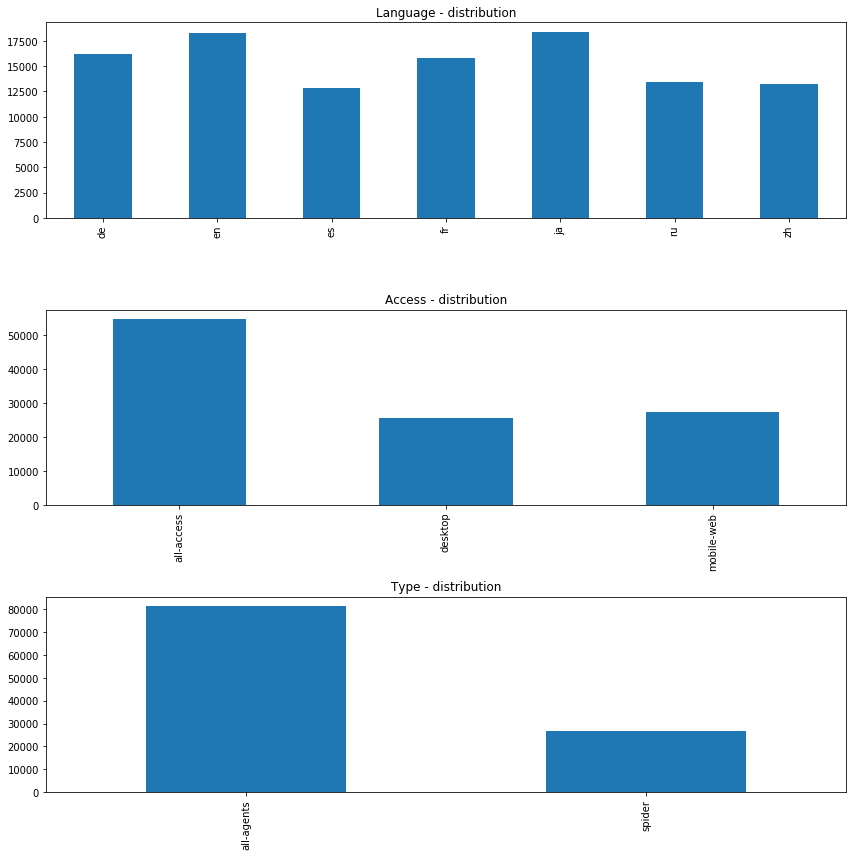

In [9]:
# The distribution of Language, Access and Type.
fig, axs  = plt.subplots(3,1,figsize=(12,12))

page_details["lang"].value_counts().sort_index().plot.bar(ax=axs[0])
axs[0].set_title('Language - distribution')

page_details["access"].value_counts().sort_index().plot.bar(ax=axs[1])
axs[1].set_title('Access - distribution')

page_details["type"].value_counts().sort_index().plot.bar(ax=axs[2])
axs[2].set_title('Type - distribution')

plt.tight_layout()

In [10]:
result = pd.concat([page_details, df_cleaned], axis=1, sort=False)
result.head()

,topic,lang,access,type,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1,zh,all-access,spider,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM,zh,all-access,spider,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C,zh,all-access,spider,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute,zh,all-access,spider,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
5,5566,zh,all-access,spider,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0


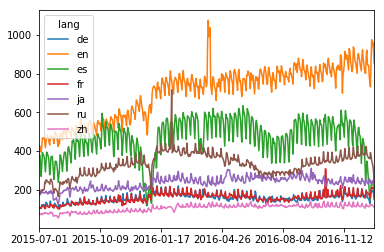

In [11]:
# obvious difference in language
groupby=result.groupby('lang').median()
groupby.T.plot()

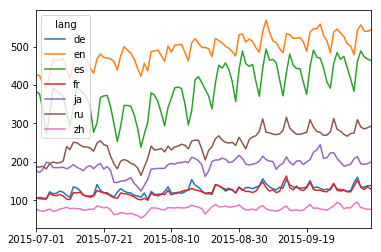

In [12]:
# usage data by each week.
groupby.iloc[:,0:100].T.plot()

In [13]:
model=df_cleaned
p=20
row = model.iloc[p,1:].values
X = row[0:549]
y = row[1:550]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.22, random_state = 0)


# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = np.reshape(X_train,(-1,1))
y_train = np.reshape(y_train,(-1,1))
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

#Training LSTM

#Reshaping Array
X_train = np.reshape(X_train, (X_train.shape[0],1,1))

# Importing the Keras libraries and packages for LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, LSTM,RNN
from tensorflow.keras.optimizers import RMSprop

gru = Sequential()
gru.add(layers.SimpleRNN(128,activation = 'relu',return_sequences=True,input_shape=(None,1)))
gru.add(layers.Dense(1))
gru.compile(optimizer=RMSprop(), loss='mae')


# Fitting the RNN to the Training set

history = gru.fit(X_train, y_train,
                    epochs=30,
                    batch_size=300,
                    validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
Train on 342 samples, validate on 86 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
342/342 [==============================] - 0s 1ms/sample - loss: 0.1064 - val_loss: 0.0571
Epoch 2/30
342/342 [==============================] - 0s 38us/sample - loss: 0.0642 - val_loss: 0.0547
Epoch 3/30
342/342 [==============================] - 0s 41us/sample - loss: 0.0618 - val_loss: 0.0534
Epoch 4/30
342/342 [==============================] - 0s 47us/sample - loss: 0.0609 - val_loss: 0.0535
Epoch 5/30
342/342 [==============================] - 0s 29us/sample - loss: 0.0609 - val_loss: 0.0534
Epoch 6/30
342/342 [==============================] - 0s 50us/sample - loss: 0.0609 - val_loss: 0.0535
Epoch 7/30
342/342 [==============================] - 0s 32us/sample - loss: 0.0608 - val_loss: 0.0533
Epoch 8/30
342/342 [==============================] - 0s 38us/sample - loss: 0.0608 - val_loss: 0.0533
Epoch 9/30
3

In [14]:
y_test.shape

(121,)

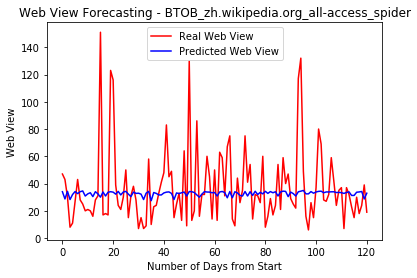

In [15]:
# Getting the predicted Web View
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (inputs.shape[0],1,1))
y_pred = gru.predict(inputs)
y_pred=np.reshape(y_pred, (inputs.shape[0],1))
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting - ' + model.iloc[p,0])
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()


In [16]:
mse = ((y_pred - y_test) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 779.1
The Root Mean Squared Error of our forecasts is 27.91


In [17]:
gru = Sequential()
gru.add(layers.SimpleRNN(128,activation = 'relu',return_sequences=True,input_shape=(None,1)))#
gru.add(layers.SimpleRNN(64, activation='relu',return_sequences=True))
gru.add(layers.Dense(100,activation='relu'))
gru.add(layers.SimpleRNN(32, activation='relu'))
gru.add(layers.Dense(10,activation='relu'))
gru.add(layers.Dense(1))
gru.compile(optimizer='adam', loss='mae')

# Fitting the RNN to the Training set

history = gru.fit(X_train, y_train,
                    epochs=30,
                    batch_size=300,
                    validation_split=0.2)

Train on 342 samples, validate on 86 samples
Epoch 1/30
342/342 [==============================] - 1s 3ms/sample - loss: 0.0938 - val_loss: 0.0678
Epoch 2/30
342/342 [==============================] - 0s 61us/sample - loss: 0.0754 - val_loss: 0.0532
Epoch 3/30
342/342 [==============================] - 0s 53us/sample - loss: 0.0603 - val_loss: 0.0541
Epoch 4/30
342/342 [==============================] - 0s 50us/sample - loss: 0.0593 - val_loss: 0.0580
Epoch 5/30
342/342 [==============================] - 0s 50us/sample - loss: 0.0620 - val_loss: 0.0574
Epoch 6/30
342/342 [==============================] - 0s 56us/sample - loss: 0.0611 - val_loss: 0.0551
Epoch 7/30
342/342 [==============================] - 0s 56us/sample - loss: 0.0595 - val_loss: 0.0532
Epoch 8/30
342/342 [==============================] - 0s 61us/sample - loss: 0.0584 - val_loss: 0.0525
Epoch 9/30
342/342 [==============================] - 0s 56us/sample - loss: 0.0584 - val_loss: 0.0526
Epoch 10/30
342/342 [========

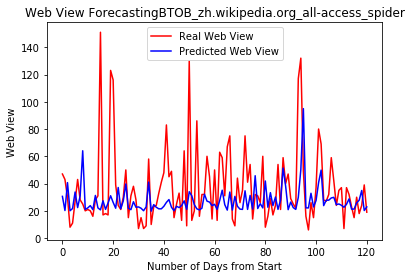

In [18]:
# Getting the predicted Web View
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (inputs.shape[0],1,1))
y_pred = gru.predict(inputs)
y_pred=np.reshape(y_pred, (inputs.shape[0],1))
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting'+model.iloc[p,0])
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

In [19]:
mse = ((y_pred - y_test) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 943.17
The Root Mean Squared Error of our forecasts is 30.71


LSTM

In [20]:
from tensorflow.keras import optimizers
# Initialising the lstm
regressor = Sequential()

# Adding the input layerand the LSTM layer

regressor.add(LSTM(units = 256, activation = 'relu', input_shape = (None, 1)))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = optimizers.RMSprop(lr=0.01), loss = 'mse')

history = regressor.fit(X_train, y_train,
                    epochs=100,
                    batch_size=300,
                    validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 342 samples, validate on 86 samples
Epoch 1/100
342/342 [==============================] - 1s 4ms/sample - loss: 0.0200 - val_loss: 0.0063
Epoch 2/100
342/342 [==============================] - 0s 149us/sample - loss: 0.0119 - val_loss: 0.0059
Epoch 3/100
342/342 [==============================] - 0s 132us/sample - loss: 0.0107 - val_loss: 0.0055
Epoch 4/100
342/342 [==============================] - 0s 123us/sample - loss: 0.0105 - val_loss: 0.0056
Epoch 5/100
342/342 [==============================] - 0s 143us/sample - loss: 0.0108 - val_loss: 0.0074
Epoch 6/100
342/342 [==============================] - 0s 126us/sample - loss: 0.0116 - val_loss: 0.0064
Epoch 7/100
342/342 [==============================] - 0s 123us/sample - loss: 0.0108 - val_loss: 0.0057
Epoch 8/100
342/342 [==============================] - 0s 140us/sample - loss: 0.0105 - val_loss: 0.0068
Epoch 9/100
342/342 [==============================] - 0s 120us/sampl

Epoch 75/100
342/342 [==============================] - 0s 111us/sample - loss: 0.0109 - val_loss: 0.0055
Epoch 76/100
342/342 [==============================] - 0s 111us/sample - loss: 0.0105 - val_loss: 0.0063
Epoch 77/100
342/342 [==============================] - 0s 137us/sample - loss: 0.0106 - val_loss: 0.0055
Epoch 78/100
342/342 [==============================] - 0s 170us/sample - loss: 0.0106 - val_loss: 0.0071
Epoch 79/100
342/342 [==============================] - 0s 126us/sample - loss: 0.0113 - val_loss: 0.0060
Epoch 80/100
342/342 [==============================] - 0s 126us/sample - loss: 0.0105 - val_loss: 0.0056
Epoch 81/100
342/342 [==============================] - 0s 126us/sample - loss: 0.0104 - val_loss: 0.0067
Epoch 82/100
342/342 [==============================] - 0s 120us/sample - loss: 0.0110 - val_loss: 0.0061
Epoch 83/100
342/342 [==============================] - 0s 105us/sample - loss: 0.0105 - val_loss: 0.0058
Epoch 84/100
342/342 [========================

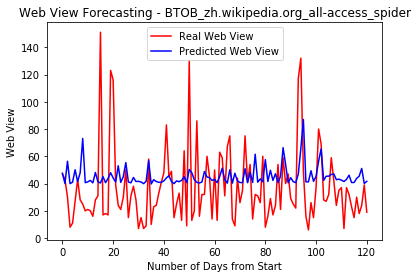

In [21]:
# Getting the predicted Web View
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (inputs.shape[0], 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)
#rcParams['figure.figsize'] = 18, 8

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting - '+model.iloc[p,0])
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

In [22]:
mse = ((y_pred - y_test) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 883.48
The Root Mean Squared Error of our forecasts is 29.72


In [23]:
from tensorflow.keras import optimizers
# Initialising the lstm
regressor = Sequential()

# Adding the input layerand the LSTM layer
regressor.add(LSTM(units = 128, activation = 'linear', return_sequences=True,input_shape = (None, 1)))
regressor.add(LSTM(units = 64, activation = 'linear'))
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mse')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train,
                    epochs=25,
                    batch_size=300,
                    validation_split=0.2)

Train on 342 samples, validate on 86 samples
Epoch 1/25
342/342 [==============================] - 2s 6ms/sample - loss: 0.0200 - val_loss: 0.0115
Epoch 2/25
342/342 [==============================] - 0s 73us/sample - loss: 0.0183 - val_loss: 0.0101
Epoch 3/25
342/342 [==============================] - 0s 82us/sample - loss: 0.0166 - val_loss: 0.0087
Epoch 4/25
342/342 [==============================] - 0s 70us/sample - loss: 0.0152 - val_loss: 0.0076
Epoch 5/25
342/342 [==============================] - 0s 102us/sample - loss: 0.0138 - val_loss: 0.0067
Epoch 6/25
342/342 [==============================] - 0s 76us/sample - loss: 0.0127 - val_loss: 0.0060
Epoch 7/25
342/342 [==============================] - 0s 64us/sample - loss: 0.0118 - val_loss: 0.0056
Epoch 8/25
342/342 [==============================] - 0s 85us/sample - loss: 0.0111 - val_loss: 0.0054
Epoch 9/25
342/342 [==============================] - 0s 73us/sample - loss: 0.0107 - val_loss: 0.0056
Epoch 10/25
342/342 [=======

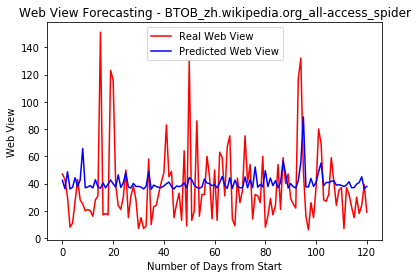

In [24]:
# Getting the predicted Web View
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (inputs.shape[0], 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)
#rcParams['figure.figsize'] = 18, 8

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting - '+model.iloc[p,0])
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()


In [25]:
mse = ((y_pred - y_test) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))


The Mean Squared Error of our forecasts is 816.86
The Root Mean Squared Error of our forecasts is 28.58


In [ ]:
sklearn.linear_model.LinearRegression

Train on 342 samples, validate on 86 samples
Epoch 1/25
342/342 [==============================] - 2s 7ms/sample - loss: 0.0299 - val_loss: 0.0183
Epoch 2/25
342/342 [==============================] - 0s 79us/sample - loss: 0.0276 - val_loss: 0.0165
Epoch 3/25
342/342 [==============================] - 0s 85us/sample - loss: 0.0254 - val_loss: 0.0149
Epoch 4/25
342/342 [==============================] - 0s 79us/sample - loss: 0.0234 - val_loss: 0.0133
Epoch 5/25
342/342 [==============================] - 0s 114us/sample - loss: 0.0215 - val_loss: 0.0119
Epoch 6/25
342/342 [==============================] - 0s 88us/sample - loss: 0.0198 - val_loss: 0.0107
Epoch 7/25
342/342 [==============================] - 0s 94us/sample - loss: 0.0182 - val_loss: 0.0097
Epoch 8/25
342/342 [==============================] - 0s 91us/sample - loss: 0.0169 - val_loss: 0.0090
Epoch 9/25
342/342 [==============================] - 0s 88us/sample - loss: 0.0159 - val_loss: 0.0086
Epoch 10/25
342/342 [=======

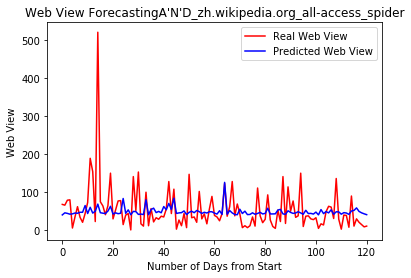

The Mean Squared Error of our forecasts is 3605.35
The Root Mean Squared Error of our forecasts is 60.04
Train on 342 samples, validate on 86 samples
Epoch 1/25
342/342 [==============================] - 3s 8ms/sample - loss: 0.0198 - val_loss: 0.0075
Epoch 2/25
342/342 [==============================] - 0s 85us/sample - loss: 0.0187 - val_loss: 0.0066
Epoch 3/25
342/342 [==============================] - 0s 117us/sample - loss: 0.0177 - val_loss: 0.0058
Epoch 4/25
342/342 [==============================] - 0s 96us/sample - loss: 0.0168 - val_loss: 0.0052
Epoch 5/25
342/342 [==============================] - 0s 97us/sample - loss: 0.0160 - val_loss: 0.0046
Epoch 6/25
342/342 [==============================] - 0s 88us/sample - loss: 0.0154 - val_loss: 0.0042
Epoch 7/25
342/342 [==============================] - 0s 96us/sample - loss: 0.0148 - val_loss: 0.0040
Epoch 8/25
342/342 [==============================] - 0s 88us/sample - loss: 0.0145 - val_loss: 0.0039
Epoch 9/25
342/342 [======

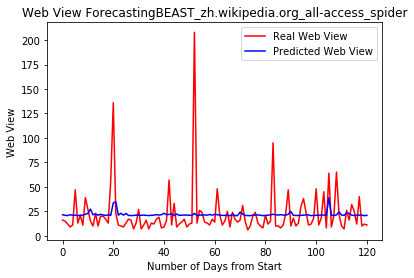

The Mean Squared Error of our forecasts is 600.93
The Root Mean Squared Error of our forecasts is 24.51
Train on 342 samples, validate on 86 samples
Epoch 1/25
342/342 [==============================] - 3s 8ms/sample - loss: 0.0312 - val_loss: 0.0147
Epoch 2/25
342/342 [==============================] - 0s 82us/sample - loss: 0.0290 - val_loss: 0.0131
Epoch 3/25
342/342 [==============================] - 0s 85us/sample - loss: 0.0269 - val_loss: 0.0116
Epoch 4/25
342/342 [==============================] - 0s 94us/sample - loss: 0.0252 - val_loss: 0.0103
Epoch 5/25
342/342 [==============================] - 0s 99us/sample - loss: 0.0234 - val_loss: 0.0092
Epoch 6/25
342/342 [==============================] - 0s 111us/sample - loss: 0.0218 - val_loss: 0.0082
Epoch 7/25
342/342 [==============================] - 0s 82us/sample - loss: 0.0203 - val_loss: 0.0074
Epoch 8/25
342/342 [==============================] - 0s 82us/sample - loss: 0.0191 - val_loss: 0.0069
Epoch 9/25
342/342 [=======

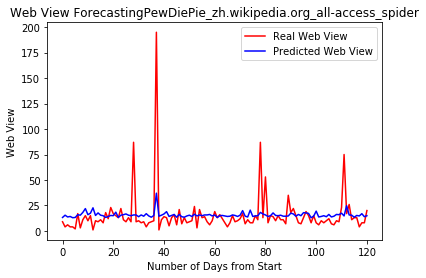

The Mean Squared Error of our forecasts is 444.48
The Root Mean Squared Error of our forecasts is 21.08
Train on 342 samples, validate on 86 samples
Epoch 1/25
342/342 [==============================] - 3s 9ms/sample - loss: 0.0135 - val_loss: 0.0074
Epoch 2/25
342/342 [==============================] - 0s 99us/sample - loss: 0.0124 - val_loss: 0.0065
Epoch 3/25
342/342 [==============================] - 0s 85us/sample - loss: 0.0114 - val_loss: 0.0058
Epoch 4/25
342/342 [==============================] - 0s 105us/sample - loss: 0.0105 - val_loss: 0.0052
Epoch 5/25
342/342 [==============================] - 0s 88us/sample - loss: 0.0098 - val_loss: 0.0048
Epoch 6/25
342/342 [==============================] - 0s 91us/sample - loss: 0.0093 - val_loss: 0.0046
Epoch 7/25
342/342 [==============================] - 0s 91us/sample - loss: 0.0089 - val_loss: 0.0045
Epoch 8/25
342/342 [==============================] - 0s 99us/sample - loss: 0.0087 - val_loss: 0.0046
Epoch 9/25
342/342 [=======

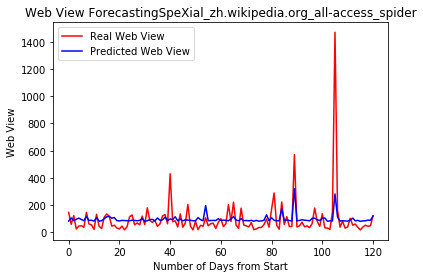

The Mean Squared Error of our forecasts is 22376.41
The Root Mean Squared Error of our forecasts is 149.59
Train on 342 samples, validate on 86 samples
Epoch 1/25
342/342 [==============================] - 4s 12ms/sample - loss: 0.0050 - val_loss: 0.0021
Epoch 2/25
342/342 [==============================] - 0s 88us/sample - loss: 0.0046 - val_loss: 0.0018
Epoch 3/25
342/342 [==============================] - 0s 82us/sample - loss: 0.0044 - val_loss: 0.0016
Epoch 4/25
342/342 [==============================] - 0s 79us/sample - loss: 0.0042 - val_loss: 0.0015
Epoch 5/25
342/342 [==============================] - 0s 79us/sample - loss: 0.0041 - val_loss: 0.0015
Epoch 6/25
342/342 [==============================] - 0s 79us/sample - loss: 0.0042 - val_loss: 0.0015
Epoch 7/25
342/342 [==============================] - 0s 76us/sample - loss: 0.0042 - val_loss: 0.0015
Epoch 8/25
342/342 [==============================] - 0s 79us/sample - loss: 0.0042 - val_loss: 0.0015
Epoch 9/25
342/342 [====

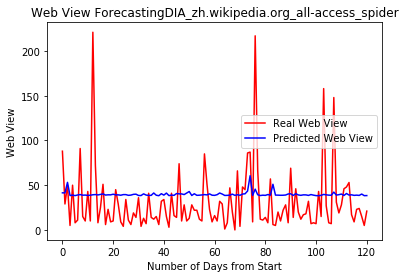

The Mean Squared Error of our forecasts is 1402.71
The Root Mean Squared Error of our forecasts is 37.45
Train on 342 samples, validate on 86 samples
Epoch 1/25
342/342 [==============================] - 4s 12ms/sample - loss: 0.0023 - val_loss: 0.0137
Epoch 2/25
342/342 [==============================] - 0s 85us/sample - loss: 0.0020 - val_loss: 0.0133
Epoch 3/25
342/342 [==============================] - 0s 82us/sample - loss: 0.0019 - val_loss: 0.0131
Epoch 4/25
342/342 [==============================] - 0s 79us/sample - loss: 0.0019 - val_loss: 0.0130
Epoch 5/25
342/342 [==============================] - 0s 82us/sample - loss: 0.0019 - val_loss: 0.0130
Epoch 6/25
342/342 [==============================] - 0s 85us/sample - loss: 0.0019 - val_loss: 0.0130
Epoch 7/25
342/342 [==============================] - 0s 85us/sample - loss: 0.0019 - val_loss: 0.0130
Epoch 8/25
342/342 [==============================] - 0s 82us/sample - loss: 0.0019 - val_loss: 0.0130
Epoch 9/25
342/342 [======

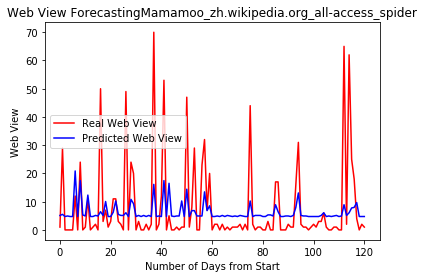

The Mean Squared Error of our forecasts is 231.2
The Root Mean Squared Error of our forecasts is 15.21
Train on 342 samples, validate on 86 samples
Epoch 1/25
342/342 [==============================] - 5s 14ms/sample - loss: 0.0507 - val_loss: 0.0621
Epoch 2/25
342/342 [==============================] - 0s 123us/sample - loss: 0.0467 - val_loss: 0.0579
Epoch 3/25
342/342 [==============================] - 0s 102us/sample - loss: 0.0429 - val_loss: 0.0538
Epoch 4/25
342/342 [==============================] - 0s 102us/sample - loss: 0.0392 - val_loss: 0.0498
Epoch 5/25
342/342 [==============================] - 0s 99us/sample - loss: 0.0356 - val_loss: 0.0459
Epoch 6/25
342/342 [==============================] - 0s 111us/sample - loss: 0.0322 - val_loss: 0.0420
Epoch 7/25
342/342 [==============================] - 0s 97us/sample - loss: 0.0288 - val_loss: 0.0383
Epoch 8/25
342/342 [==============================] - 0s 105us/sample - loss: 0.0255 - val_loss: 0.0347
Epoch 9/25
342/342 [===

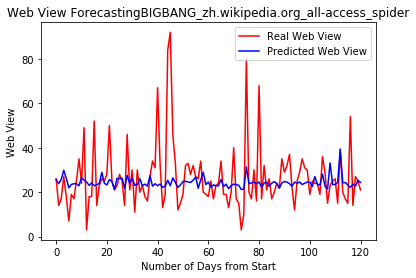

The Mean Squared Error of our forecasts is 213.84
The Root Mean Squared Error of our forecasts is 14.62
Train on 342 samples, validate on 86 samples
Epoch 1/25
342/342 [==============================] - 5s 15ms/sample - loss: 0.0737 - val_loss: 0.0527
Epoch 2/25
342/342 [==============================] - 0s 102us/sample - loss: 0.0694 - val_loss: 0.0489
Epoch 3/25
342/342 [==============================] - 0s 99us/sample - loss: 0.0653 - val_loss: 0.0453
Epoch 4/25
342/342 [==============================] - 0s 99us/sample - loss: 0.0612 - val_loss: 0.0417
Epoch 5/25
342/342 [==============================] - 0s 105us/sample - loss: 0.0571 - val_loss: 0.0382
Epoch 6/25
342/342 [==============================] - 0s 99us/sample - loss: 0.0531 - val_loss: 0.0347
Epoch 7/25
342/342 [==============================] - 0s 99us/sample - loss: 0.0490 - val_loss: 0.0312
Epoch 8/25
342/342 [==============================] - 0s 99us/sample - loss: 0.0450 - val_loss: 0.0279
Epoch 9/25
342/342 [=====

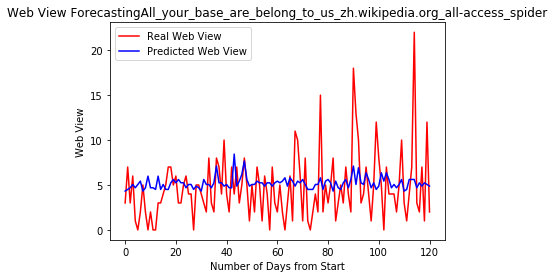

The Mean Squared Error of our forecasts is 13.69
The Root Mean Squared Error of our forecasts is 3.7
Train on 342 samples, validate on 86 samples
Epoch 1/25
342/342 [==============================] - 5s 16ms/sample - loss: 0.0111 - val_loss: 0.0034
Epoch 2/25
342/342 [==============================] - 0s 126us/sample - loss: 0.0102 - val_loss: 0.0028
Epoch 3/25
342/342 [==============================] - 0s 123us/sample - loss: 0.0094 - val_loss: 0.0024
Epoch 4/25
342/342 [==============================] - 0s 117us/sample - loss: 0.0088 - val_loss: 0.0022
Epoch 5/25
342/342 [==============================] - 0s 120us/sample - loss: 0.0083 - val_loss: 0.0022
Epoch 6/25
342/342 [==============================] - 0s 117us/sample - loss: 0.0081 - val_loss: 0.0023
Epoch 7/25
342/342 [==============================] - 0s 120us/sample - loss: 0.0080 - val_loss: 0.0025
Epoch 8/25
342/342 [==============================] - 0s 117us/sample - loss: 0.0080 - val_loss: 0.0027
Epoch 9/25
342/342 [===

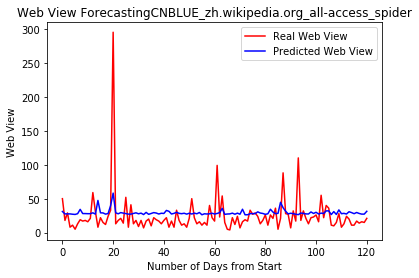

The Mean Squared Error of our forecasts is 923.36
The Root Mean Squared Error of our forecasts is 30.39
Train on 342 samples, validate on 86 samples
Epoch 1/25
342/342 [==============================] - 6s 16ms/sample - loss: 0.0287 - val_loss: 0.0384
Epoch 2/25
342/342 [==============================] - 0s 167us/sample - loss: 0.0264 - val_loss: 0.0361
Epoch 3/25
342/342 [==============================] - 0s 170us/sample - loss: 0.0243 - val_loss: 0.0339
Epoch 4/25
342/342 [==============================] - 0s 164us/sample - loss: 0.0223 - val_loss: 0.0318
Epoch 5/25
342/342 [==============================] - 0s 152us/sample - loss: 0.0205 - val_loss: 0.0299
Epoch 6/25
342/342 [==============================] - 0s 155us/sample - loss: 0.0188 - val_loss: 0.0281
Epoch 7/25
342/342 [==============================] - 0s 146us/sample - loss: 0.0174 - val_loss: 0.0266
Epoch 8/25
342/342 [==============================] - 0s 140us/sample - loss: 0.0161 - val_loss: 0.0253
Epoch 9/25
342/342 [

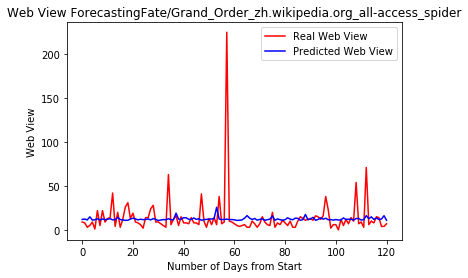

The Mean Squared Error of our forecasts is 504.65
The Root Mean Squared Error of our forecasts is 22.46


In [26]:
model=df_cleaned
import random
for i in range(0,10):
    j = random.randint(0,100)
    
    row = model.iloc[j,1:].values
    X = row[0:549]
    y = row[1:550]
  
    # Splitting the dataset into the Training set and Test set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.22, random_state = 0)

    # Feature Scaling
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler()
    X_train = np.reshape(X_train,(-1,1))
    y_train = np.reshape(y_train,(-1,1))
    X_train = sc.fit_transform(X_train)
    y_train = sc.fit_transform(y_train)

    #Training LSTM

    #Reshaping Array
    X_train = np.reshape(X_train, (X_train.shape[0],1,1))

    # Importing the Keras libraries and packages for LSTM
    from tensorflow.keras.models import Sequential
    from tensorflow.keras import layers
    from tensorflow.keras.layers import Dense, LSTM,RNN
    from tensorflow.keras.optimizers import RMSprop

    from tensorflow.keras import optimizers
    # Initialising the lstm
    regressor = Sequential()

    # Adding the input layerand the LSTM layer
    regressor.add(LSTM(units = 128, activation = 'linear', return_sequences=True,input_shape = (None, 1)))
    regressor.add(LSTM(units = 64, activation = 'linear'))
    regressor.add(Dense(units = 1))

    # Compiling the RNN
    regressor.compile(optimizer = 'adam', loss = 'mse')

    # Fitting the RNN to the Training set
    regressor.fit(X_train, y_train,
                        epochs=25,
                        batch_size=300,
                        validation_split=0.2)
   
    # Getting the predicted Web View
    inputs = X_test
    inputs = np.reshape(inputs,(-1,1))
    inputs = sc.transform(inputs)
    inputs = np.reshape(inputs, (inputs.shape[0], 1, 1))
    y_pred = regressor.predict(inputs)
    y_pred = sc.inverse_transform(y_pred)
    
    #Visualising Result
    plt.figure
    plt.plot(y_test, color = 'red', label = 'Real Web View')
    plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
    plt.title('Web View Forecasting'+model.iloc[j,0])
    plt.xlabel('Number of Days from Start')
    plt.ylabel('Web View')
    plt.legend()
    plt.show()
    mse = ((y_pred - y_test) ** 2).mean()
    print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
    print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))